# 109511276 練鈞揚
## HW 1 : Part I Linear Regression 
### Using Python 3.11 version

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# https://blog.csdn.net/deniro_li/article/details/104076555
from pprint import pprint , pformat

In [2]:
# input the data
inputData = pd.read_csv("./HW1.csv")

# split the data
tran_data, test_data = inputData.iloc[:50], inputData.iloc[50:]

x_train, t_train = tran_data['x'], tran_data['t']
x_test, t_test = test_data['x'], test_data['t']

# x_predict = np.linspace(0, 3, num=1001)
x_predict = np.linspace(0,3,num=31)

df_output = pd.DataFrame()
df_output_MSE = pd.DataFrame()
df_output_best_MSE = pd.DataFrame()

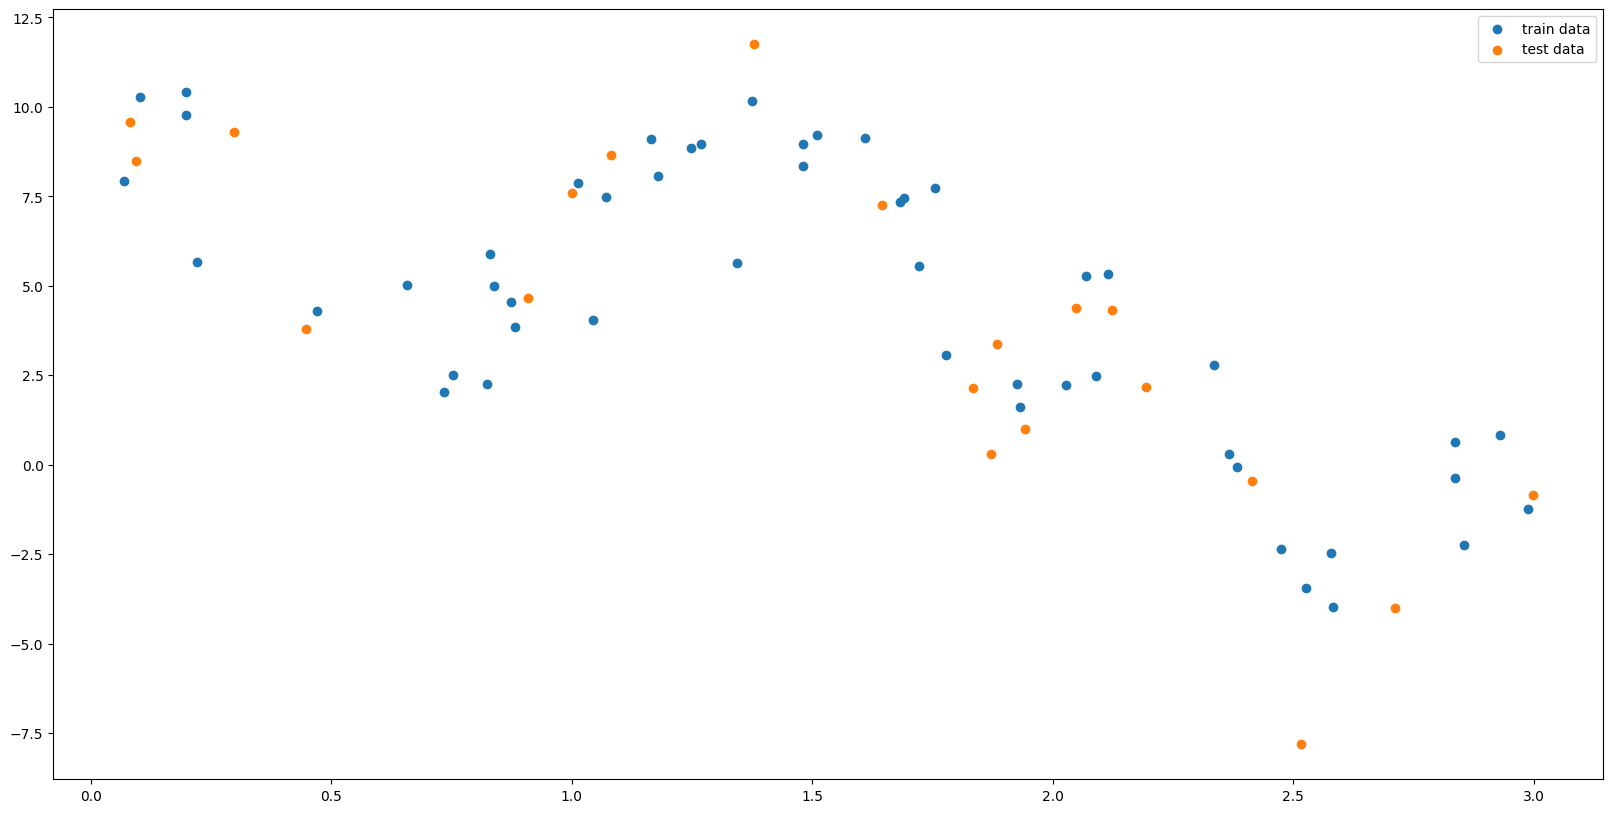

In [3]:
plt.figure(figsize=(20,10))
plt.scatter(
    x_train,
    t_train,
    label="train data"
)

plt.scatter(
    x_test,
    t_test,
    label="test data"
)
plt.legend()

plt.show()

In [4]:
class PreModel:
    def __init__(self ,S , M) -> None:
        self.S = S
        self.M = M
        self.mui_function = lambda x: (3 * x) / M
        
        self.design_matrix = None
        self.maximum_likelihood = None

    def __str__(self) -> str:
        design_matrix_str = self.design_matrix.shape if self.design_matrix is not None else None
        maximum_likelihood_str = self.maximum_likelihood.shape if self.maximum_likelihood is not None else None

        return f"S={self.S}, M={self.M}, design_matrix={design_matrix_str}, maximum_likelihood={maximum_likelihood_str}"

    def __repr__(self) -> str:
        return self.__str__()

    @staticmethod
    def logistic_sigmoid(a):
        return 1/(1 + np.exp(-a))

    def basic_function(self, x, j):
        return self.logistic_sigmoid((x - self.mui_function(j)) / self.S) if j != 0 else np.ones(len(x))

    def make_design_matrix(self, x):
        return np.array(
            [self.basic_function(x, j) for j in range(self.M)]
        ).T

    @staticmethod
    def find_maximum_likelihood(design_matrix , t):
        return np.linalg.pinv(design_matrix) @ t

    def find_data_maximum_likelihood(self, x , t):

        self.design_matrix = self.make_design_matrix(x)
        self.maximum_likelihood = PreModel.find_maximum_likelihood(design_matrix=self.design_matrix, t=t)

        return self.maximum_likelihood

    def predict_result(self,x):
        return self.make_design_matrix(x) @ self.maximum_likelihood


## Error Function (I.4)

In [5]:
S = 0.1
M = [1, 3, 5, 10, 20, 30]

model_dict = {mItem: PreModel(S=S, M=mItem) for mItem in M}
model_result_output_train_dict = dict()

error_function_train_list = {}
for k , val in model_dict.items():
    para = val.find_data_maximum_likelihood(x_train, t_train)

    pred_train_t = val.predict_result(x=x_predict)

    model_result_output_train_dict |= {k: pred_train_t}

    df_output[f'M={k}'] = pd.Series(pred_train_t)


print("\n".join(map(str, model_dict.values())))
# df_output


S=0.1, M=1, design_matrix=(50, 1), maximum_likelihood=(1,)
S=0.1, M=3, design_matrix=(50, 3), maximum_likelihood=(3,)
S=0.1, M=5, design_matrix=(50, 5), maximum_likelihood=(5,)
S=0.1, M=10, design_matrix=(50, 10), maximum_likelihood=(10,)
S=0.1, M=20, design_matrix=(50, 20), maximum_likelihood=(20,)
S=0.1, M=30, design_matrix=(50, 30), maximum_likelihood=(30,)


### I.1 plot data point (Only the Training set) and the fitting curve

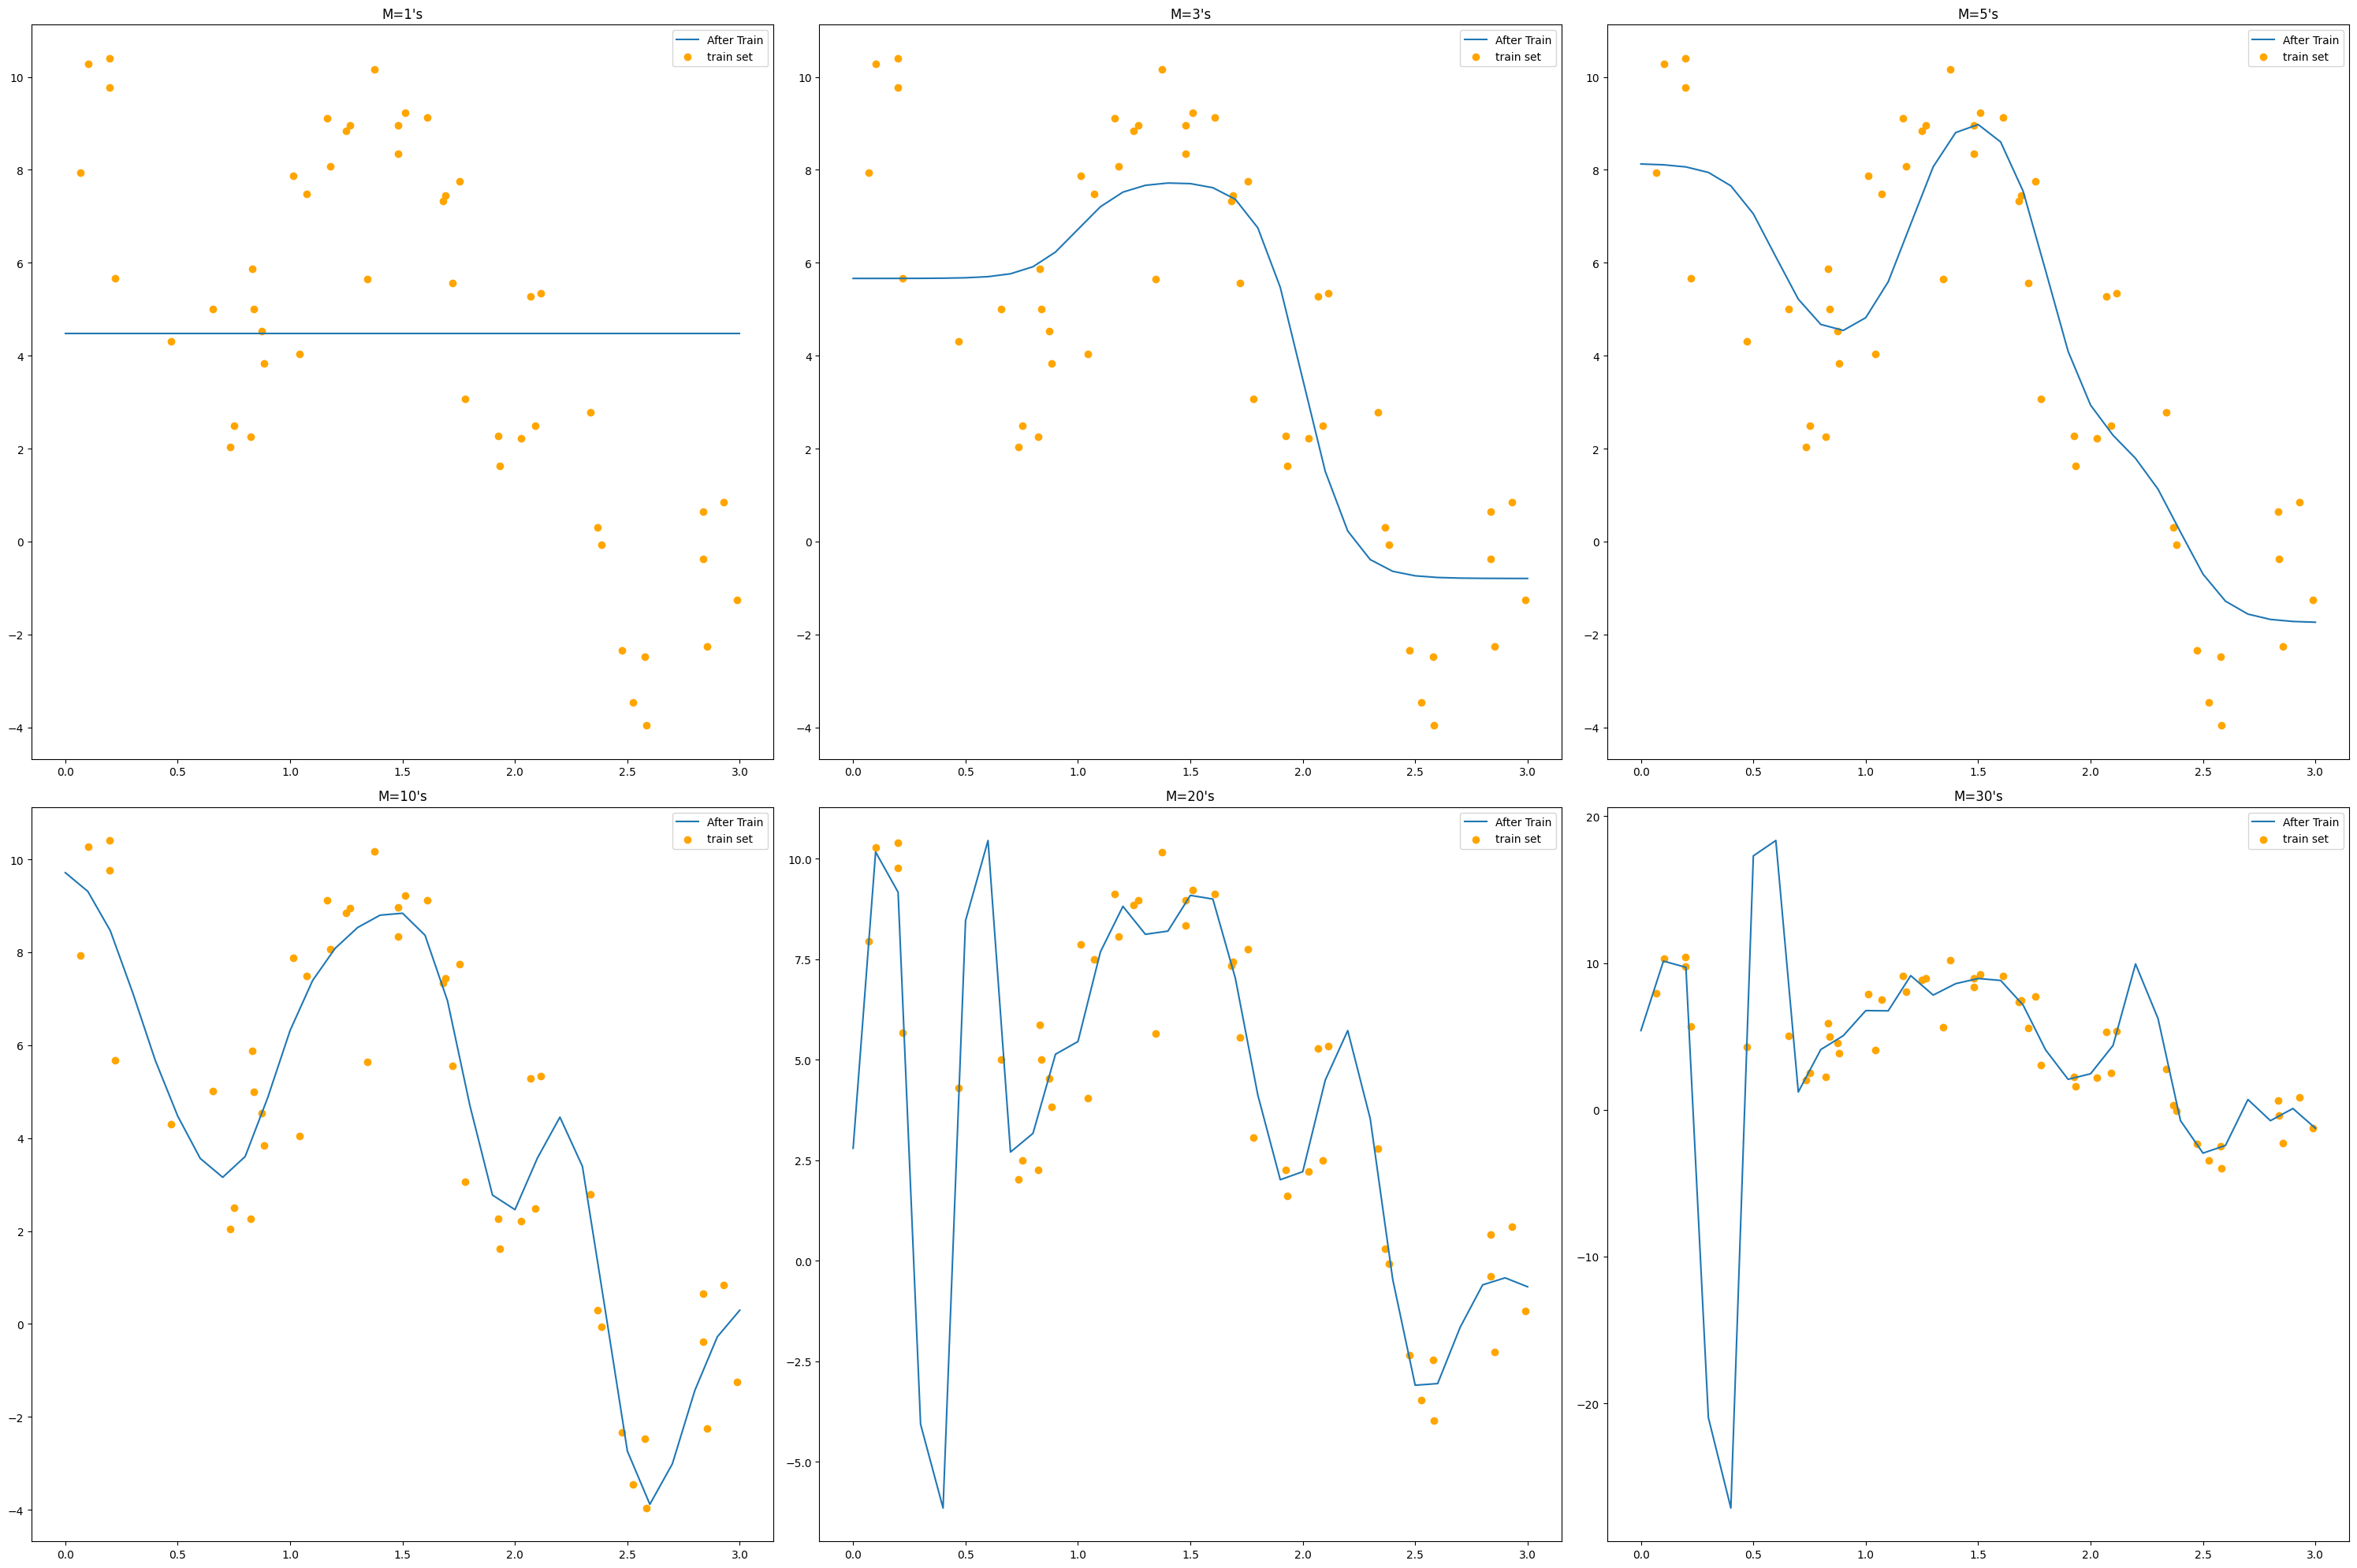

In [6]:
# plot graph (a)
figure, axis = plt.subplots(2, 3, figsize=(30, 20), tight_layout=True)

for index, (m_of_train, predict_result_t) in enumerate(model_result_output_train_dict.items()):
    axis[index//3, index%3].set_title(f"M={m_of_train}'s")

    axis[index // 3, index % 3].plot(x_predict,
                                     predict_result_t,
                                     label="After Train")

    axis[index//3, index%3].scatter(x_train,
                                    t_train,
                                    label="train set",
                                    color="orange")

    axis[index // 3, index % 3].legend()

plt.show()


In [7]:
model_30_dict = {
    mItem: PreModel(S=S, M=mItem) 
    for mItem in range(1,31)
}


In [8]:
for m in model_30_dict.keys():
    model_30_dict[m].find_data_maximum_likelihood(x=x_train,t=t_train)

In [9]:
# from pprint import pprint
model_result_output_train_dict = {
    k: val.predict_result(x=x_train)
    for k, val in model_30_dict.items()
}


model_result_output_test_dict = {
    k: val.predict_result(x=x_test)
    for k, val in model_30_dict.items()
}

def mean_square_error(pred_set , true_set):
    return np.mean(np.square(pred_set - true_set))


In [10]:
model_result_train_MSR = {
    k: mean_square_error(pred_set=v.reshape(-1), true_set=t_train)
    for k, v in model_result_output_train_dict.items()
}

model_result_test_MSR = {
    k: mean_square_error(pred_set=v.reshape(-1), true_set=t_test)
    for k, v in model_result_output_test_dict.items()
}

df_output_MSE['MSE Train'] = pd.Series(model_result_train_MSR)
df_output_MSE['MSE Test'] = pd.Series(model_result_test_MSR)
df_output_MSE


,MSE Train,MSE Test
1,15.780138,23.553872
2,10.437561,12.456971
3,5.120135,10.436526
4,5.654459,9.063279
5,3.307220,7.203639
6,3.010277,7.080397
7,2.676985,5.979137
8,2.587564,5.941122
9,2.016223,3.821983
10,1.673749,3.308359


### I.2 Plot the Mean Square Error in the training set and the Testing set

<Figure size 640x480 with 0 Axes>

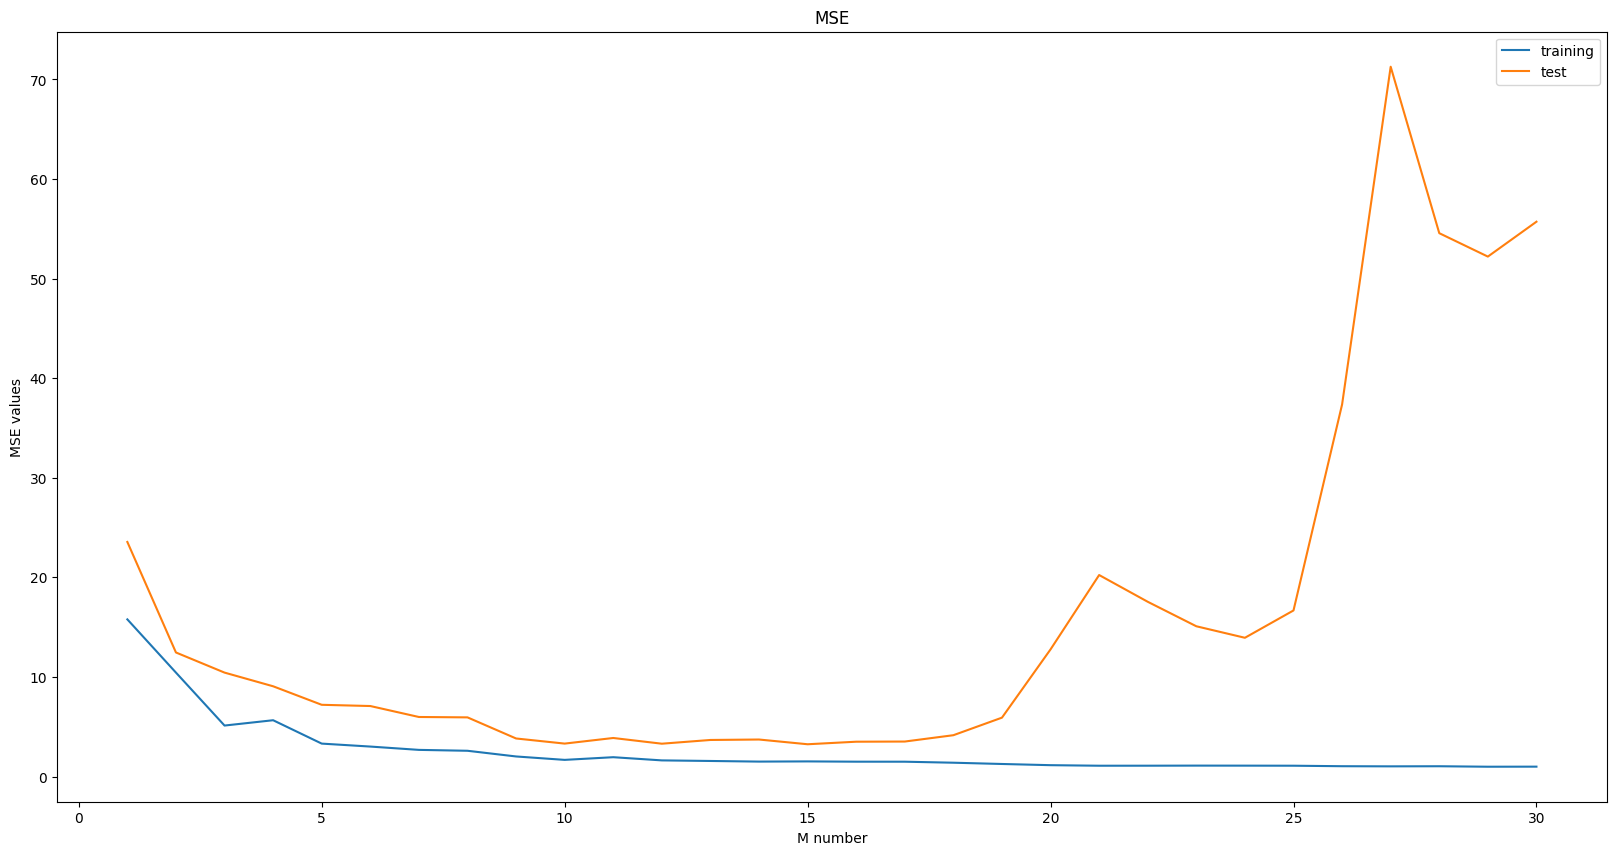

In [11]:
# plot b
plt.clf()
plt.figure(figsize=(20,10))
plt.plot(model_result_train_MSR.keys(),
         model_result_train_MSR.values(),
         label="training")

plt.plot(model_result_test_MSR.keys(),
         model_result_test_MSR.values(),
         label="test")

plt.title("MSE")
plt.xlabel("M number")
plt.ylabel("MSE values")
plt.legend()
plt.show()


### Reference  (5-fold cross-validation)
- https://ithelp.ithome.com.tw/articles/10279240
- https://zhuanlan.zhihu.com/p/250253050
- https://www.youtube.com/watch?v=wjILv3-UGM8

In [12]:
class ModuleValidation:

    @staticmethod
    # return x , t
    def split_data(number_split , x , t):
        if len(x) != len(t):
            return None

        return np.array_split(x, number_split), np.array_split(t, number_split)

    @staticmethod
    def merge_data(data_list , except_item_index):
        merge_thing = [val for i ,val in enumerate(data_list) if i != except_item_index]
        return np.concatenate(merge_thing)


    @staticmethod
    # x_data and the t_data is the training data
    def k_cross_validation(model :PreModel , number_to_validation:int , x_data , t_data):
        x_train_term, t_train_term = ModuleValidation.split_data(number_to_validation, x_data, t_data)
        error_list = np.array([])

        for i in range(number_to_validation):
            # using data
            x_train_use, x_test_use = ModuleValidation.merge_data(x_train_term, except_item_index=i), x_train_term[i]
            t_train_use, t_test_use = ModuleValidation.merge_data(t_train_term, except_item_index=i), t_train_term[i]

            maximum_likelihood_part = model.find_data_maximum_likelihood(x_train_use, t_train_use)
            
            model_predict_t_res = model.predict_result(x_test_use)

            error_list = np.append(
                error_list,
                mean_square_error(pred_set=model_predict_t_res.reshape(-1),true_set=t_test_use))
        # pprint(acc_list)
        return np.mean(error_list)


In [13]:
## find the best m
testing_m_range = 30

testing_m_dict = {
    m_test:
    ModuleValidation.k_cross_validation(model=PreModel(S, M=m_test),
                                        number_to_validation=5,
                                        x_data=x_train,
                                        t_data=t_train)
    for m_test in range(1, testing_m_range)
}


In [14]:
pd.DataFrame(pd.Series(testing_m_dict))

,0
1,16.514838
2,11.320059
3,5.920184
4,6.624103
5,4.547143
6,4.171733
7,3.607398
8,3.544950
9,3.148996
10,3.500257


In [15]:
best_m_less_error = min(testing_m_dict.items() , key=lambda x : x[1])

print(best_m_less_error)
df_output_best_MSE[
    f'best M={best_m_less_error[0]} 5 cross AVG MSE'] = pd.Series(best_m_less_error[1])


(9, 3.148996427906723)


### Train again using the training set and do MSE in the testing set

In [16]:
## train again using the training set and do MSE in the testing set
best_m, _ = best_m_less_error

best_model = PreModel(S=S, M=best_m)
res = best_model.find_data_maximum_likelihood(x_train, t_train)
print(best_model)

pred_t = best_model.predict_result(x_predict)

df_output[f'best M={best_m}'] = pd.Series(pred_t)
len(pred_t)

S=0.1, M=9, design_matrix=(50, 9), maximum_likelihood=(9,)


31

In [17]:
## MSE
pred_t_of_test = best_model.predict_result(x_test)
best_model_MSE = mean_square_error(pred_set=pred_t_of_test.reshape(-1),
                                   true_set=t_test)
print(f"Model using M={best_m_less_error}, MSR={best_model_MSE}")

# df_output
df_output_best_MSE[f'best M={best_m_less_error} Test MSE'] = pd.Series(best_model_MSE)


Model using M=(9, 3.148996427906723), MSR=3.821983285976999


<Figure size 640x480 with 0 Axes>

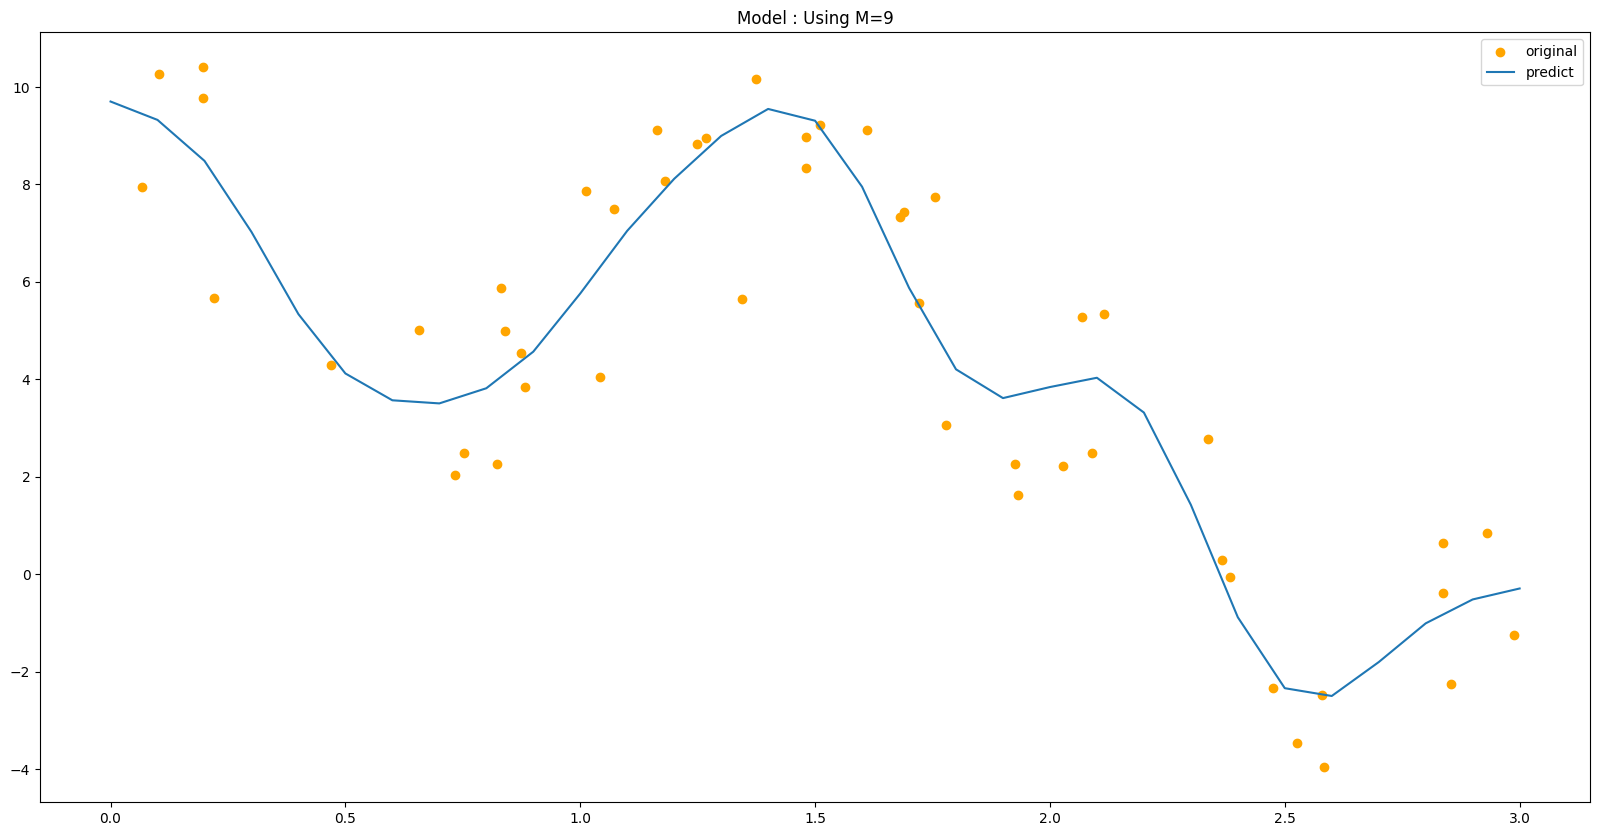

In [18]:
## plot the graph (using the x_train_data)
pred_train_t = best_model.predict_result(x_predict)
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(x_train, t_train, label="original", color="orange")
plt.plot(x_predict, pred_train_t, label="predict")
plt.title(f"Model : Using M={best_m}")
plt.legend()
plt.show()


# I.4 Consider with regularization

In [19]:
class PreRegularizationModel(PreModel):
    def __init__(self, S, M , lambda_para) -> None:
        super().__init__(S, M)
        self.lambda_para = lambda_para


    def find_maximum_likelihood(self, design_matrix, t):
        # design_matrix_t = design_matrix.T

        dmTdm = design_matrix.T @ design_matrix

        return np.linalg.inv(dmTdm + self.lambda_para * np.identity(design_matrix.shape[1])) @ design_matrix.T @ t

    def find_data_maximum_likelihood(self, x, t):

        self.design_matrix = self.make_design_matrix(x)
        self.maximum_likelihood = self.find_maximum_likelihood(design_matrix=self.design_matrix, t=t)

        return self.maximum_likelihood

In [20]:
default_lambda = 1 / 10

model_regularization_dict = {
    mItem : PreRegularizationModel(S=S,
                                   M=mItem ,
                                   lambda_para=default_lambda)
    for mItem in M
}
model_regularization_result_output_train_dict = dict()

for k, val in model_regularization_dict.items():
    para = val.find_data_maximum_likelihood(x_train, t_train)

    pred_train_t = val.predict_result(x=x_predict)

    model_regularization_result_output_train_dict |= {k: pred_train_t}

    df_output[f'R M={k}'] = pd.Series(pred_train_t)

print("\n".join(map(str, model_regularization_dict.values())))



S=0.1, M=1, design_matrix=(50, 1), maximum_likelihood=(1,)
S=0.1, M=3, design_matrix=(50, 3), maximum_likelihood=(3,)
S=0.1, M=5, design_matrix=(50, 5), maximum_likelihood=(5,)
S=0.1, M=10, design_matrix=(50, 10), maximum_likelihood=(10,)
S=0.1, M=20, design_matrix=(50, 20), maximum_likelihood=(20,)
S=0.1, M=30, design_matrix=(50, 30), maximum_likelihood=(30,)


### I.4 plot data point (Only the Training set) and the fitting curve

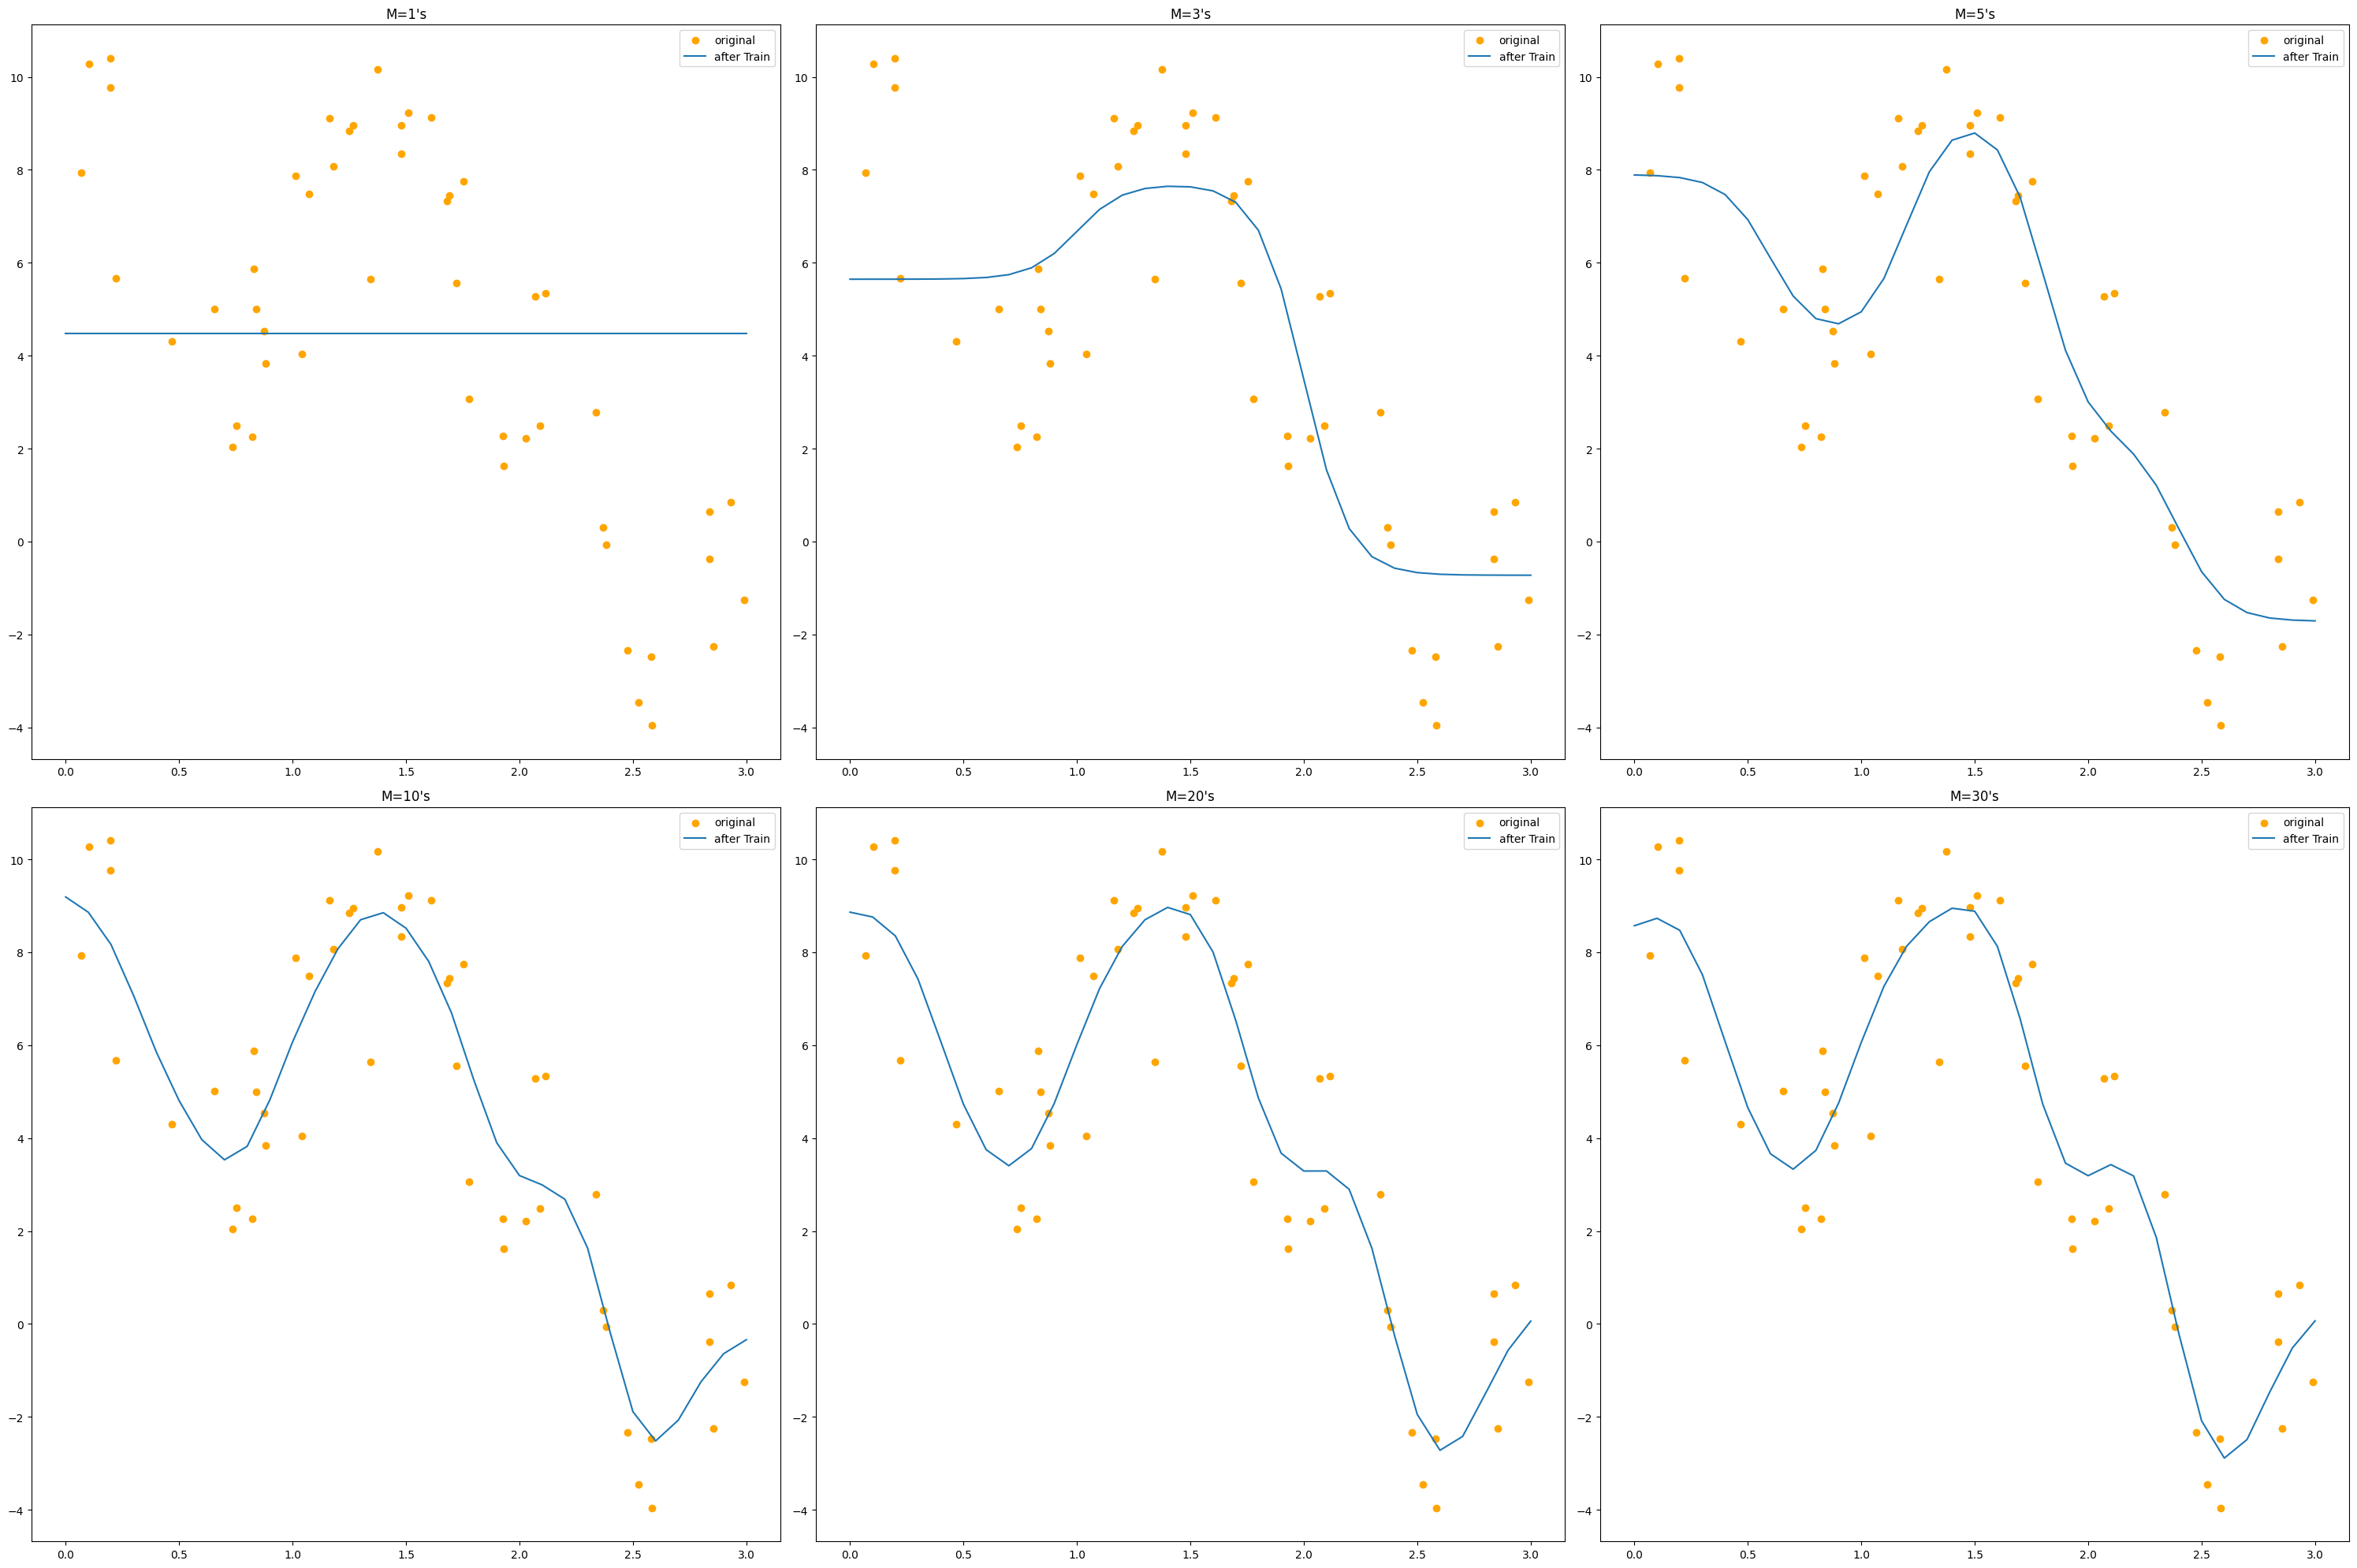

In [21]:
figure, axis = plt.subplots(2, 3, figsize=(30, 20), tight_layout=True)
# axis[0, 0].plot(x_train, model_result_output_dict[])
for index, val in enumerate(model_regularization_result_output_train_dict.items()):
    mTrain, res_t = val
    axis[index // 3, index % 3].set_title(f"M={mTrain}'s")
    axis[index // 3, index % 3].scatter(x_train,
                                        t_train,
                                        label="original",
                                        color="orange")
    axis[index // 3, index % 3].plot(x_predict, res_t, label="after Train")
    axis[index // 3, index % 3].legend()
figure.tight_layout()
plt.show()


### MSE

In [22]:
model_regularization_dict_30 = {
    mItem: PreRegularizationModel(S=S, M=mItem, lambda_para=default_lambda)
    for mItem in range(1,31)
}

In [23]:
for m in model_regularization_dict_30.keys():
    model_regularization_dict_30[m].find_data_maximum_likelihood(x=x_train,t=t_train)

In [24]:
model_regularization_result_output_train_dict = {
    k: val.predict_result(x=x_train)
    for k, val in model_regularization_dict_30.items()
}
model_regularization_result_output_test_dict = {
    k: val.predict_result(x=x_test)
    for k, val in model_regularization_dict_30.items()
}

In [25]:
model_regularization_result_train_MSR = {
    k: mean_square_error(pred_set=v.reshape(-1), true_set=t_train)
    for k, v in model_regularization_result_output_train_dict.items()
}

model_regularization_result_test_MSR = {
    k: mean_square_error(pred_set=v.reshape(-1), true_set=t_test)
    for k, v in model_regularization_result_output_test_dict.items()
}


In [26]:
# df = pd.DataFrame({"M": model_regularization_result_train_MSR.keys()})
# df["train"] = model_regularization_result_train_MSR.values()
# df["test"] = model_regularization_result_test_MSR.values()

# df

df_output_MSE["Regularization MSE Train"] = pd.Series(model_regularization_result_train_MSR)
df_output_MSE["Regularization MSE Test"] = pd.Series(model_regularization_result_test_MSR)
df_output_MSE

,MSE Train,MSE Test,Regularization MSE Train,Regularization MSE Test
1,15.780138,23.553872,15.780218,23.541464
2,10.437561,12.456971,10.439130,12.537551
3,5.120135,10.436526,5.122922,10.471262
4,5.654459,9.063279,5.657507,9.072619
5,3.307220,7.203639,3.322108,7.211422
6,3.010277,7.080397,3.035030,7.235114
7,2.676985,5.979137,2.710655,6.168543
8,2.587564,5.941122,2.627616,6.195563
9,2.016223,3.821983,2.140514,4.732504
10,1.673749,3.308359,1.982251,4.564011


<Figure size 640x480 with 0 Axes>

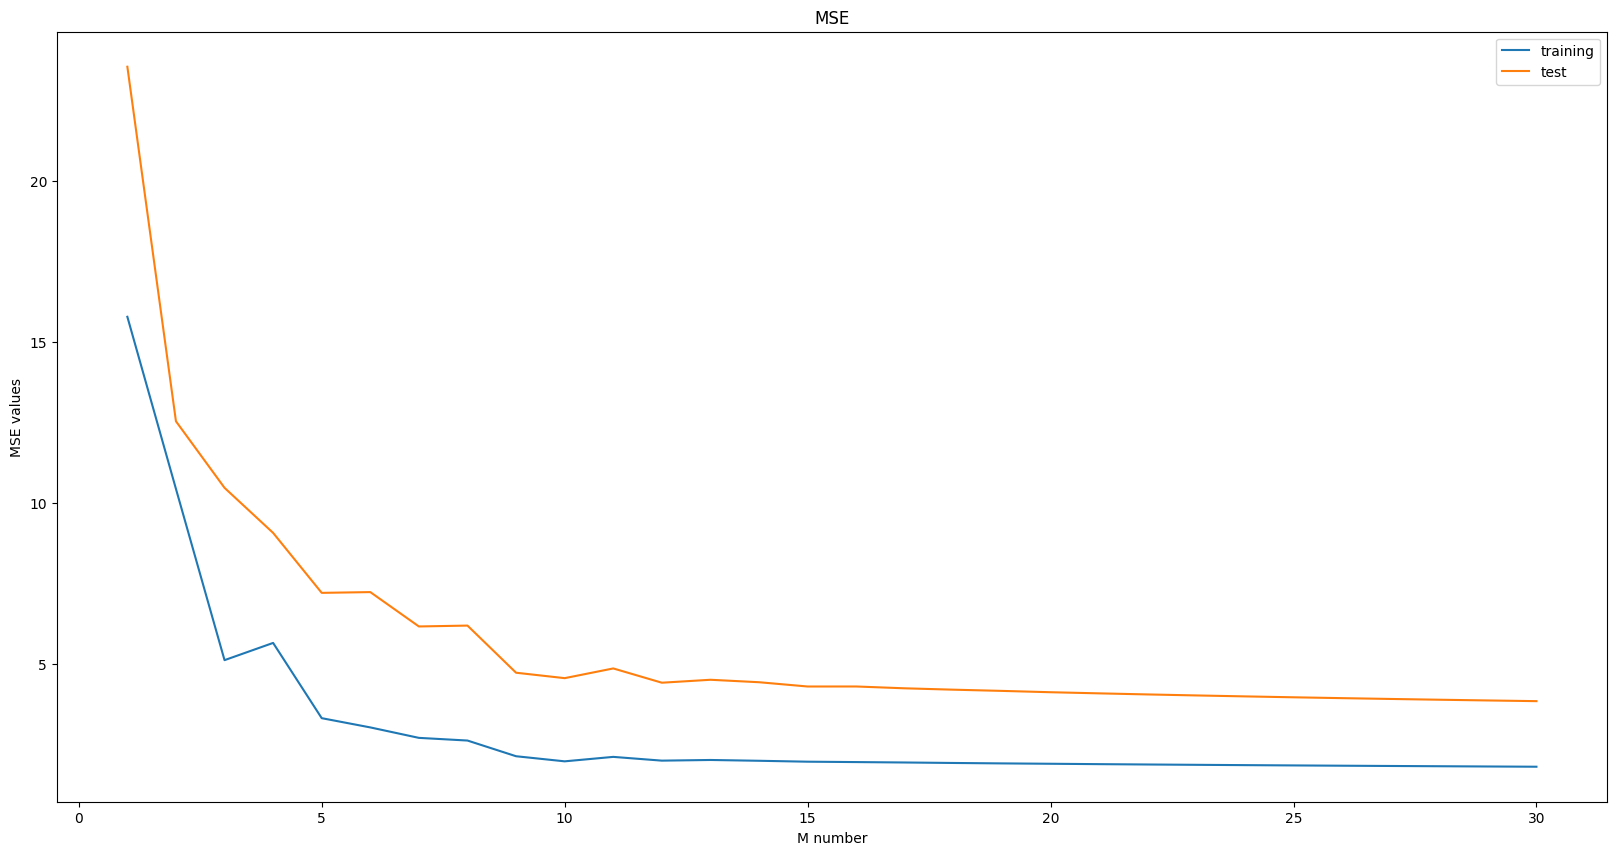

In [27]:
plt.clf()
plt.figure(figsize=(20,10))
plt.plot(model_regularization_result_train_MSR.keys(),
         model_regularization_result_train_MSR.values() , label="training")

plt.plot(model_regularization_result_test_MSR.keys(),
         model_regularization_result_test_MSR.values() , label="test")

plt.title("MSE")
plt.xlabel("M number")
plt.ylabel("MSE values")
plt.legend()
plt.show()


## Output result file

In [28]:
# output the file
file_name = "Part1_output.xlsx"
df_output.set_index(x_predict,inplace=True)

with pd.ExcelWriter(file_name, mode='w') as writer:
    df_output.to_excel(writer, sheet_name="output predict")

with pd.ExcelWriter(file_name, mode='a') as writer:
    df_output_MSE.to_excel(writer, sheet_name="MSE")
    
with pd.ExcelWriter(file_name, mode='a') as writer:
    df_output_best_MSE.to_excel(writer, sheet_name="best MSE")


In [29]:
# df_output_MSE.to_excel("output_Part1.xlsx")